**"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import csv

from mlxtend.preprocessing import OnehotTransactions

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 1. Explaining the Support, confidence, expectedconfidence, and lift

- Support = Number of Rows having both A AND B / Total Number of Rows 

- Confidence = Number of Rows having both A AND B / Number of Rows with A 

- Expected Confidence = Number of rows with B / Total Number of Rows 

- Lift = Confidence / Expected Confidence.


# 2. Descriptive analysis

In [5]:
df1 = pd.read_csv("data/retail.csv")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [6]:
# Cheking missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17450 entries, 0 to 17449
Data columns (total 8 columns):
InvoiceNo      17450 non-null int64
StockCode      17450 non-null object
Description    17450 non-null object
Quantity       17450 non-null int64
InvoiceDate    17450 non-null object
UnitPrice      17450 non-null float64
CustomerID     17384 non-null float64
Country        17450 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ MB


# 2.a

In [7]:
df1["Country"].unique()

array(['France', 'Germany'], dtype=object)

- There total two countries are represented, they are France, Germany

- 2b. how many times STARS GIFT TAPE appear

In [9]:
basket1['STARS GIFT TAPE'].sum()

516.0

- 2c how many times STARS GIFT TAPE sold

In [10]:
basket1['STARS GIFT TAPE'].count()

849

- STARS GIFT TAPE appers 516 times, sold 849 quantities.

In [11]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket1_sets = basket1.applymap(encode_units)
basket1_sets.drop('POSTAGE', inplace=True, axis=1)    

In [12]:
frequent_itemsets1 = apriori(basket1_sets, min_support=0.07, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.084806,[ALARM CLOCK BAKELIKE PINK]
1,0.074205,[JAM MAKING SET PRINTED]
2,0.087161,[JUMBO BAG RED RETROSPOT]
3,0.089517,[JUMBO BAG WOODLAND ANIMALS]
4,0.090695,[LUNCH BAG APPLE DESIGN]
5,0.094229,[LUNCH BAG RED RETROSPOT]
6,0.071849,[LUNCH BAG SPACEBOY DESIGN]
7,0.096584,[LUNCH BAG WOODLAND]
8,0.100118,[LUNCH BOX WITH CUTLERY RETROSPOT]
9,0.093051,[PACK OF 72 RETROSPOT CAKE CASES]


In [13]:
basket1_sets = basket1.applymap(encode_units)
# No need to track postage
basket1_sets.drop('POSTAGE', inplace=True, axis=1)
basket1_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Frequent item mining & Association analysis

- a. Frequent items with column names

In [14]:
apriori(basket1_sets, min_support=0.1, use_colnames=True).head()


,support,itemsets
0,0.100118,[LUNCH BOX WITH CUTLERY RETROSPOT]
1,0.140165,[PLASTERS IN TIN CIRCUS PARADE]
2,0.121319,[PLASTERS IN TIN SPACEBOY]
3,0.153121,[PLASTERS IN TIN WOODLAND ANIMALS]
4,0.114252,[RABBIT NIGHT LIGHT]


**b. the most popular items sold**

In [15]:
apriori(basket1_sets, min_support=0.1, use_colnames=True).sort_values(['support'],ascending=False).head()


,support,itemsets
8,0.204947,[ROUND SNACK BOXES SET OF4 WOODLAND]
3,0.153121,[PLASTERS IN TIN WOODLAND ANIMALS]
1,0.140165,[PLASTERS IN TIN CIRCUS PARADE]
5,0.135453,[RED TOADSTOOL LED NIGHT LIGHT]
7,0.134276,[ROUND SNACK BOXES SET OF 4 FRUITS]


** The top two popular products are postage, round snack boxes of 4 woodland, and plasters in tin woodland animals**

In [17]:
frequent_itemsets3 = apriori(basket1_sets, min_support=0.1, use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.100118,[LUNCH BOX WITH CUTLERY RETROSPOT],1
1,0.140165,[PLASTERS IN TIN CIRCUS PARADE],1
2,0.121319,[PLASTERS IN TIN SPACEBOY],1
3,0.153121,[PLASTERS IN TIN WOODLAND ANIMALS],1
4,0.114252,[RABBIT NIGHT LIGHT],1
5,0.135453,[RED TOADSTOOL LED NIGHT LIGHT],1
6,0.131920,[REGENCY CAKESTAND 3 TIER],1
7,0.134276,[ROUND SNACK BOXES SET OF 4 FRUITS],1
8,0.204947,[ROUND SNACK BOXES SET OF4 WOODLAND],1
9,0.113074,[SPACEBOY LUNCH BOX],1


** C. top association rules **

In [18]:
rules = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.1).sort_values(['lift'],ascending=False)
rules.head(10)


,antecedants,consequents,support,confidence,lift
4,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.089517,0.907895,9.882085
5,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.091873,0.884615,9.882085
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.153121,0.530769,4.374981
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.121319,0.669903,4.374981
6,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.140165,0.596639,3.896509
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.153121,0.546154,3.896509
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.204947,0.488506,3.638082
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.134276,0.745614,3.638082


** The top two association rules in terms of lift are PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER cups**
** set/6 red spotty paper cups => set/6 red spotty paper plates**

***3d. the association rul where lift >=2, and confidence >=0.5***

In [19]:
rules[ (rules['confidence'] >= 0.5) &
       (rules['lift'] >= 2) ]

,antecedants,consequents,support,confidence,lift
4,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.089517,0.907895,9.882085
5,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.091873,0.884615,9.882085
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.153121,0.530769,4.374981
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.121319,0.669903,4.374981
6,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.140165,0.596639,3.896509
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.153121,0.546154,3.896509
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.134276,0.745614,3.638082


# 4. Association Analysis for France

In [21]:
basket = (df1[df1['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [22]:

# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [23]:
basket_sets = basket.applymap(encode_units)
# No need to track postage
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data = [ filter(None, a) for a in basket_sets ]
data

['10 COLOUR SPACEBOY PEN',
 '12 COLOURED PARTY BALLOONS',
 '12 EGG HOUSE PAINTED WOOD',
 '12 MESSAGE CARDS WITH ENVELOPES',
 '12 PENCIL SMALL TUBE WOODLAND',
 '12 PENCILS SMALL TUBE RED RETROSPOT',
 '12 PENCILS SMALL TUBE SKULL',
 '12 PENCILS TALL TUBE POSY',
 '12 PENCILS TALL TUBE RED RETROSPOT',
 '12 PENCILS TALL TUBE WOODLAND',
 '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 '16 PIECE CUTLERY SET PANTRY DESIGN',
 '18PC WOODEN CUTLERY SET DISPOSABLE',
 '20 DOLLY PEGS RETROSPOT',
 '200 RED + WHITE BENDY STRAWS',
 '3 HOOK HANGER MAGIC GARDEN',
 '3 PIECE SPACEBOY COOKIE CUTTER SET',
 "3 RAFFIA RIBBONS 50'S CHRISTMAS",
 '3 STRIPEY MICE FELTCRAFT',
 '3 TIER CAKE TIN RED AND CREAM',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 '36 DOILIES DOLLY GIRL',
 '36 DOILIES VINTAGE CHRISTMAS',
 '36 FOIL HEART CAKE CASES',
 '36 FOIL STAR CAKE CASES',
 '36 PENCILS TUBE RED RETROSPOT',
 '36 PENCILS TUBE SKULLS',
 '36 PENCILS TUBE WOODLAND',
 '3D DOG PICTURE PLAYING CARDS',
 '3D HEARTS  HONEYCOMB PAPER GARLAND',
 '

In [24]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.071429,[4 TRADITIONAL SPINNING TOPS]
1,0.096939,[ALARM CLOCK BAKELIKE GREEN]
2,0.102041,[ALARM CLOCK BAKELIKE PINK]
3,0.094388,[ALARM CLOCK BAKELIKE RED]
4,0.081633,[BAKING SET 9 PIECE RETROSPOT]
5,0.071429,[CHILDRENS CUTLERY DOLLY GIRL]
6,0.099490,[DOLLY GIRL LUNCH BOX]
7,0.096939,[JUMBO BAG RED RETROSPOT]
8,0.076531,[JUMBO BAG WOODLAND ANIMALS]
9,0.125000,[LUNCH BAG APPLE DESIGN]


** a. show the items appearing in more than 10% of total number**

In [25]:
frequent_itemsets2 = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.102041,[ALARM CLOCK BAKELIKE PINK]
1,0.125000,[LUNCH BAG APPLE DESIGN]
2,0.153061,[LUNCH BAG RED RETROSPOT]
3,0.119898,[LUNCH BAG SPACEBOY DESIGN]
4,0.117347,[LUNCH BAG WOODLAND]
5,0.142857,[LUNCH BOX WITH CUTLERY RETROSPOT]
6,0.104592,[MINI PAINT SET VINTAGE]
7,0.102041,[PACK OF 72 RETROSPOT CAKE CASES]
8,0.168367,[PLASTERS IN TIN CIRCUS PARADE]
9,0.137755,[PLASTERS IN TIN SPACEBOY]


** b. The most popular items sold in France**

In [26]:
apriori(basket_sets, min_support=0.1, use_colnames=True).sort_values(['support'],ascending=False).head(2)


,support,itemsets
11,0.188776,[RABBIT NIGHT LIGHT]
13,0.181122,[RED TOADSTOOL LED NIGHT LIGHT]


- The most popular items sold in France are rabbit night light and red toadstool led night light

In [27]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5).sort_values(['lift'],ascending=False)
rules2.head(10)


,antecedants,consequents,support,confidence,lift
2,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.960000,6.968889
3,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.888889,6.968889
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.800000,6.030769
7,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.769231,6.030769
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.137755,0.740741,5.584046
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.769231,5.584046
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.170918,0.611940,4.442233
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.137755,0.759259,4.442233
4,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.168367,0.606061,3.545907
5,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.170918,0.597015,3.545907


** c. Display the association rules whose lift acore is greater than 5**

In [28]:
rules2[ (rules2['lift'] >= 5) ].sort_values(['lift'],ascending=False)

,antecedants,consequents,support,confidence,lift
2,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.960000,6.968889
3,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.888889,6.968889
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.800000,6.030769
7,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.769231,6.030769
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.137755,0.740741,5.584046
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.769231,5.584046


** d. the top two associations in terms of lift score are set/6 red spotty paper plates and set red spotty paper cups**
** and Set/6 Red SPOTTY PAPER CUPS => SET/6 RED SPOTTY PAPER PLATES**

** e. the association rules where lift >=5 and confidence >=0.8**

In [29]:
rules2[ (rules2['confidence'] >= 0.8) &
       (rules2['lift'] >= 5) ]

,antecedants,consequents,support,confidence,lift
2,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.960000,6.968889
3,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.888889,6.968889
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.800000,6.030769


- The association are red spotty paper plates =>red spotty paper cups
- red spotty paper cups => red spotty paper plates
- red spotty paper plates => set/20 red spotty paper napkings

In [36]:
for i in basket_sets:
    print i

10 COLOUR SPACEBOY PEN
12 COLOURED PARTY BALLOONS
12 EGG HOUSE PAINTED WOOD
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
12 PENCILS SMALL TUBE SKULL
12 PENCILS TALL TUBE POSY
12 PENCILS TALL TUBE RED RETROSPOT
12 PENCILS TALL TUBE WOODLAND
15CM CHRISTMAS GLASS BALL 20 LIGHTS
16 PIECE CUTLERY SET PANTRY DESIGN
18PC WOODEN CUTLERY SET DISPOSABLE
20 DOLLY PEGS RETROSPOT
200 RED + WHITE BENDY STRAWS
3 HOOK HANGER MAGIC GARDEN
3 PIECE SPACEBOY COOKIE CUTTER SET
3 RAFFIA RIBBONS 50'S CHRISTMAS
3 STRIPEY MICE FELTCRAFT
3 TIER CAKE TIN RED AND CREAM
3 TRADITIONAl BISCUIT CUTTERS  SET
36 DOILIES DOLLY GIRL
36 DOILIES VINTAGE CHRISTMAS
36 FOIL HEART CAKE CASES
36 FOIL STAR CAKE CASES
36 PENCILS TUBE RED RETROSPOT
36 PENCILS TUBE SKULLS
36 PENCILS TUBE WOODLAND
3D DOG PICTURE PLAYING CARDS
3D HEARTS  HONEYCOMB PAPER GARLAND
3D SHEET OF DOG STICKERS
3D TRADITIONAL CHRISTMAS STICKERS
3D VINTAGE CHRISTMAS STICKERS
4 IVORY DINNER CANDLES SILVER FLO

RED RETROSPOT STORAGE JAR
RED RETROSPOT SUGAR JAM BOWL
RED RETROSPOT TAPE
RED RETROSPOT TEA CUP AND SAUCER
RED RETROSPOT TISSUE BOX
RED RETROSPOT TRADITIONAL TEAPOT
RED RETROSPOT UMBRELLA
RED RETROSPOT WRAP
RED ROCKING HORSE HAND PAINTED
RED SPOT CERAMIC DRAWER KNOB
RED SPOT PAPER GIFT BAG
RED SPOTTY BISCUIT TIN
RED STRIPE CERAMIC DRAWER KNOB
RED TEA TOWEL CLASSIC DESIGN
RED TOADSTOOL LED NIGHT LIGHT
RED VINTAGE SPOT BEAKER
RED WOOLLY HOTTIE WHITE HEART.
RED/CREAM STRIPE CUSHION COVER
REGENCY CAKE FORK
REGENCY CAKE SLICE
REGENCY CAKESTAND 3 TIER
REGENCY MILK JUG PINK
REGENCY SUGAR BOWL GREEN
REGENCY SUGAR TONGS
REGENCY TEA PLATE GREEN
REGENCY TEA PLATE PINK
REGENCY TEA PLATE ROSES
REGENCY TEA SPOON
REGENCY TEA STRAINER
REGENCY TEAPOT ROSES
REINDEER HEART DECORATION SILVER
RETRO COFFEE MUGS ASSORTED
RETRO MOD TRAY
RETRO PLASTIC 70'S TRAY
RETRO PLASTIC ELEPHANT TRAY
RETRO PLASTIC POLKA TRAY
RETROSPOT CANDLE  LARGE
RETROSPOT CANDLE  SMALL
RETROSPOT CHILDRENS APRON
RETROSPOT HEART HOT WATE

In [37]:
from itertools import combinations

nodes = [x for d in basket_sets for x in combinations(d, 2)]
nodes

[('1', '0'),
 ('1', ' '),
 ('1', 'C'),
 ('1', 'O'),
 ('1', 'L'),
 ('1', 'O'),
 ('1', 'U'),
 ('1', 'R'),
 ('1', ' '),
 ('1', 'S'),
 ('1', 'P'),
 ('1', 'A'),
 ('1', 'C'),
 ('1', 'E'),
 ('1', 'B'),
 ('1', 'O'),
 ('1', 'Y'),
 ('1', ' '),
 ('1', 'P'),
 ('1', 'E'),
 ('1', 'N'),
 ('0', ' '),
 ('0', 'C'),
 ('0', 'O'),
 ('0', 'L'),
 ('0', 'O'),
 ('0', 'U'),
 ('0', 'R'),
 ('0', ' '),
 ('0', 'S'),
 ('0', 'P'),
 ('0', 'A'),
 ('0', 'C'),
 ('0', 'E'),
 ('0', 'B'),
 ('0', 'O'),
 ('0', 'Y'),
 ('0', ' '),
 ('0', 'P'),
 ('0', 'E'),
 ('0', 'N'),
 (' ', 'C'),
 (' ', 'O'),
 (' ', 'L'),
 (' ', 'O'),
 (' ', 'U'),
 (' ', 'R'),
 (' ', ' '),
 (' ', 'S'),
 (' ', 'P'),
 (' ', 'A'),
 (' ', 'C'),
 (' ', 'E'),
 (' ', 'B'),
 (' ', 'O'),
 (' ', 'Y'),
 (' ', ' '),
 (' ', 'P'),
 (' ', 'E'),
 (' ', 'N'),
 ('C', 'O'),
 ('C', 'L'),
 ('C', 'O'),
 ('C', 'U'),
 ('C', 'R'),
 ('C', ' '),
 ('C', 'S'),
 ('C', 'P'),
 ('C', 'A'),
 ('C', 'C'),
 ('C', 'E'),
 ('C', 'B'),
 ('C', 'O'),
 ('C', 'Y'),
 ('C', ' '),
 ('C', 'P'),
 ('C', 'E'),

In [32]:
import networkx as nx
G = nx.MultiGraph()

In [33]:
G.add_edges_from(nodes)
from collections import Counter
c = Counter(G.edges())  # Contains frequencies of each directed edge.
c

Counter({(' ', ' '): 7319,
         (' ', '"'): 10,
         (' ', '&'): 45,
         (' ', "'"): 75,
         (' ', '+'): 84,
         (' ', ','): 44,
         (' ', '-'): 147,
         (' ', '.'): 11,
         (' ', '/'): 139,
         (' ', '0'): 239,
         (' ', '1'): 262,
         (' ', '2'): 350,
         (' ', '3'): 323,
         (' ', '4'): 176,
         (' ', '5'): 97,
         (' ', '6'): 386,
         (' ', '7'): 52,
         (' ', '8'): 8,
         (' ', '9'): 19,
         (' ', 'A'): 10949,
         (' ', 'B'): 3241,
         (' ', 'C'): 5615,
         (' ', 'D'): 4937,
         (' ', 'E'): 13291,
         (' ', 'F'): 2220,
         (' ', 'G'): 4160,
         (' ', 'H'): 3276,
         (' ', 'I'): 8106,
         (' ', 'J'): 373,
         (' ', 'K'): 2997,
         (' ', 'L'): 7247,
         (' ', 'M'): 2561,
         (' ', 'N'): 7127,
         (' ', 'O'): 9177,
         (' ', 'P'): 4108,
         (' ', 'Q'): 92,
         (' ', 'R'): 9189,
         (' ', 'S'): 8468,
    

In [34]:
from collections import Counter
c = Counter(G.edges())  # Contains frequencies of each directed edge.

for u, v, d in G.edges(data=True):
    d['weight'] = c[u, v]

print(list(G.edges(data=True)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


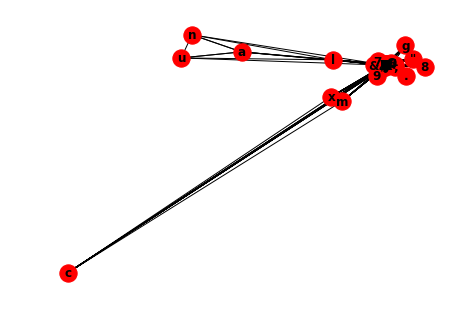

In [35]:
# does not show edge thickness
nx.draw(G, with_labels=True, font_weight='bold')